# **Basic Image Modification**

*   Image Resize : เป็นการเปลี่ยนขนาดภาพของภาพ โดยการย่อขนาดของภาพจะทำให้ความละเอียดของภาพ (Image Dimension) หรือจำนวน pixel ในภาพลดลง ส่วนการเพิ่มขนาดภาพของภาพแม้ว่าจะเพิ่มจำนวน pixel แต่ในวิธรการปกติไม่จำเป็นต้องทำให้รายละเอียดภายในภาพเพิ่มขึ้นตาม
*   Image Flip
*   Image Crop เป็นการเลือกตัดส่วนในภาพเพื่อให้ได้ภาพใหม่
*   Rotate (Only 90 / 180 / 270 Degree) เป็นการหมุนภาพ ซึ่งในส่วนการอบรมนี้จะหมายถึงการหนุมภาพในมุมฉาก
*   Operator เป็นการนำภาพตั้งแต่หนึ่งภาพมาดำเนินการร่วมกัน เช่น การนำภาพ 2 ภาพมาบวก หรือลบกัน หรือ นำภาพมาบวกหรือลบด้วยค่าคงที่ทุกจุดภาพเท่ากัน หรือ มาทำการดำเนินการทางตรรกศาสตร์ (AND, OR)



## Reading an Image form web

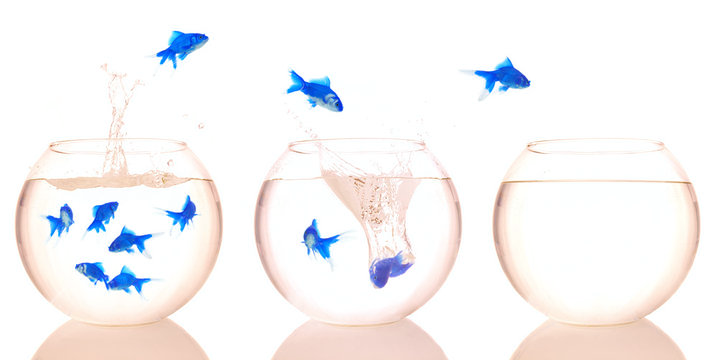

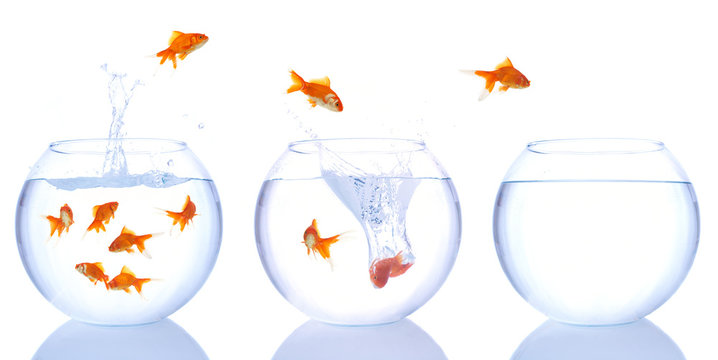

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt   #from matplotlib import pyplot as plt

url = "https://t4.ftcdn.net/jpg/00/02/65/21/360_F_2652182_kzshWTrp8SC1KwkMbLnt0NCVtD1XUf.jpg"

img_url = io.imread(url)
cv2_imshow(img_url)

image_RGB = cv.cvtColor(img_url, cv.COLOR_BGR2RGB)
cv2_imshow(image_RGB)

## Display BGR Channels of our image

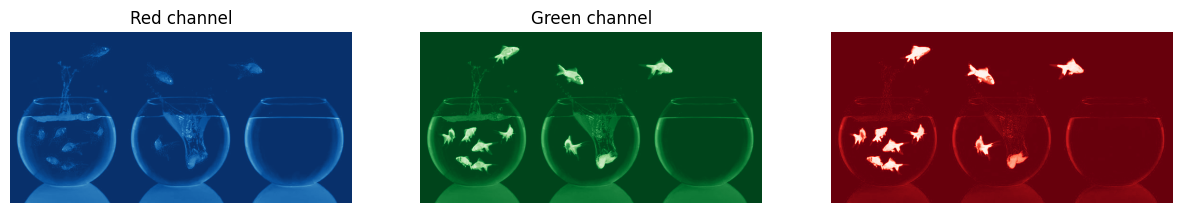

In [2]:
# Continued from the previous code.
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_url[:,:,0], cmap='Blues')
axs[1].imshow(img_url[:,:,1], cmap='Greens')
axs[2].imshow(img_url[:,:,2], cmap='Reds')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Blue channel')
axs[1].set_title('Green channel')
axs[0].set_title('Red channel')
plt.show()

## Image Resize

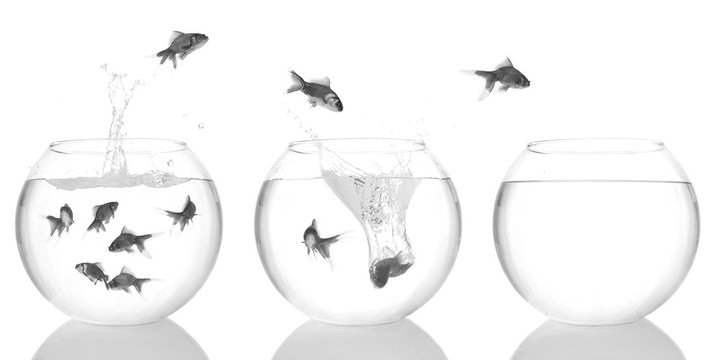

In [4]:
# Continued from the path : Reading an Image form web
img_G = img_url[:,:,1]
cv2_imshow(img_G)

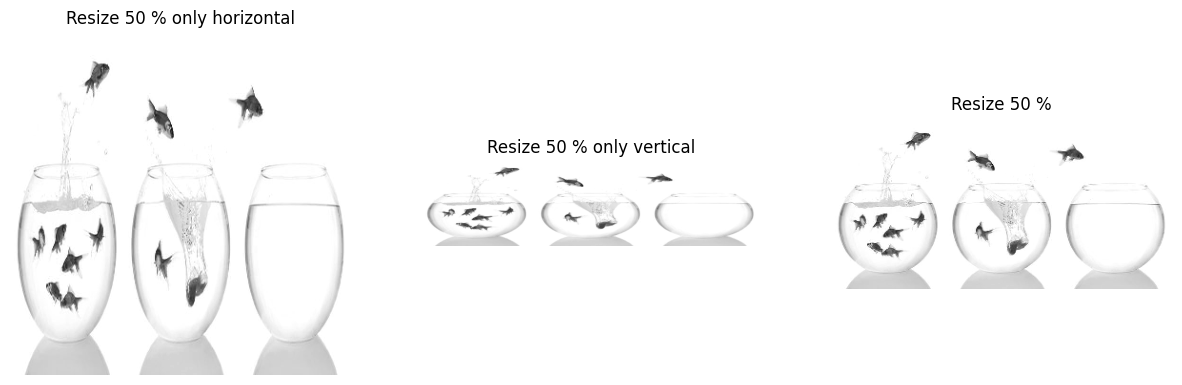

In [5]:
# Continued from the previous code.
[H,W] = img_G.shape

# resize 50 % only horizontal
img_rv = img_G[    :, 0:W:2]
# resize 50 % only vertical
img_rh = img_G[0:H:2,     :]
# resize 50 %
img_r =  img_G[0:H:2,0:W:2]


fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(img_rv, cmap='gray')
axs[1].imshow(img_rh, cmap='gray')
axs[2].imshow(img_r, cmap='gray')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Resize 50 % only horizontal')
axs[1].set_title('Resize 50 % only vertical')
axs[2].set_title('Resize 50 %')
plt.show()

## Image Flip

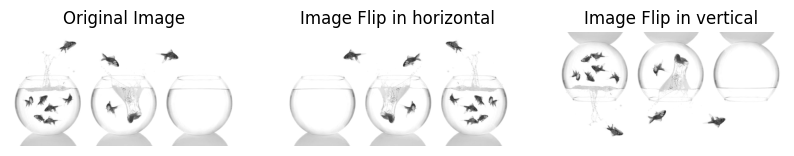

In [6]:
# Continued from the path : Reading an Image form web
# img_G = img_url[:,:,1]
# cv2_imshow(img_G)
# [H,W] = img_G.shape

# Flip with horizontal
img_fv = img_G[    :, ::-1]
# Flip with vertical
img_fh = img_G[::-1,     :]


fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img_G, cmap='gray')
axs[1].imshow(img_fv, cmap='gray')
axs[2].imshow(img_fh, cmap='gray')
axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
axs[0].set_title('Original Image')
axs[1].set_title('Image Flip in horizontal')
axs[2].set_title('Image Flip in vertical')
plt.show()

## Image Crop

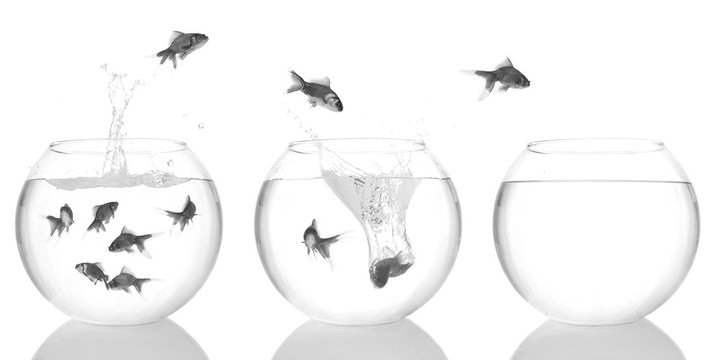

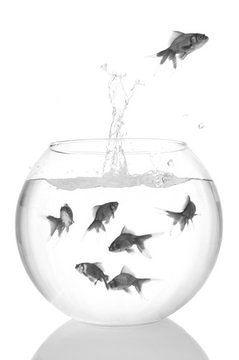

In [7]:
# Continued from the path : Reading an Image form web
# img_G = img_url[:,:,1]
# cv2_imshow(img_G)
# [H,W] = img_G.shape

# Flip Crop
img_c = img_G[: , 0:int(W/3)]

cv2_imshow(img_G)

cv2_imshow(img_c)

## Image Rotate

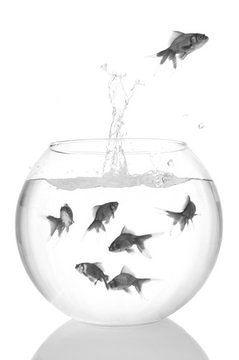

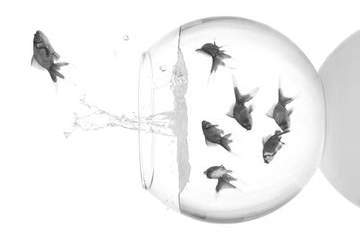

In [8]:
# Continued from the path : Reading an Image form web
# img_G = img_url[:,:,1]
# cv2_imshow(img_G)

# # Flip Crop
# img_c = img_G[: , 0:int(W/3)]
[HC,WC] = img_c.shape

# Rotate -90 Degree (90 Degree Counter Clockwise)
# img_r90 = np.transpose(img_c[::-1,:])
img_r90cc = np.zeros( (WC,HC), dtype=np.uint8)
for i in range(HC):
  for j in range(WC):
    img_r90cc[WC-j-1,i] = img_c[i,j]

cv2_imshow(img_c)
cv2_imshow(img_r90cc)

## Image Operator

### Reading an Image form web with wget

--2024-07-26 07:15:26--  https://www.ce.kmitl.ac.th/api/faculty/download/Jirasak
Resolving www.ce.kmitl.ac.th (www.ce.kmitl.ac.th)... 161.246.127.223
Connecting to www.ce.kmitl.ac.th (www.ce.kmitl.ac.th)|161.246.127.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26663 (26K) [image/jpeg]
Saving to: ‘Jirasak’

Jirasak             100%[===================>]  26.04K  --.-KB/s    in 0.08s   

2024-07-26 07:15:26 (335 KB/s) - ‘Jirasak’ saved [26663/26663]



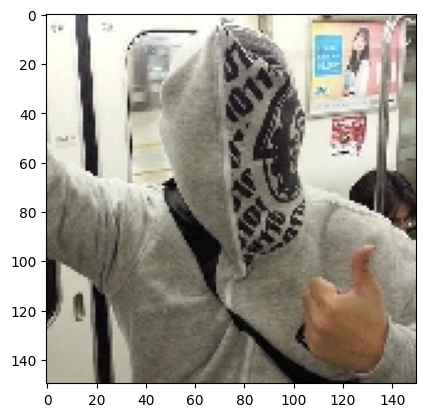

In [9]:
import numpy as np
import matplotlib.pyplot as plt   #from matplotlib import pyplot as plt
from math import sqrt

!wget "https://www.ce.kmitl.ac.th/api/faculty/download/Jirasak"

img = plt.imread('Jirasak')

plt.imshow(img)
plt.show()

[H,W,C] = img.shape

### Images addition

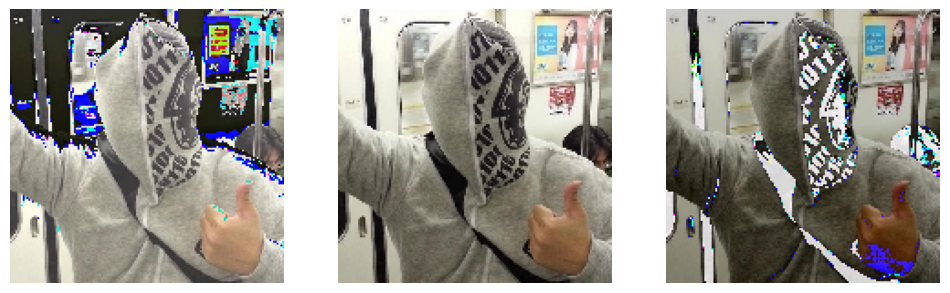

In [10]:
# Continued from the previous code.
fig=plt.figure(figsize=(12, 4))

fig.add_subplot(1, 3, 1)
plt.axis('off')
plt.imshow(img[:,:,:] + 50)

fig.add_subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img)

fig.add_subplot(1, 3, 3)
plt.axis('off')
plt.imshow(img[:,:,:] - 50)

### bitwise AND operation

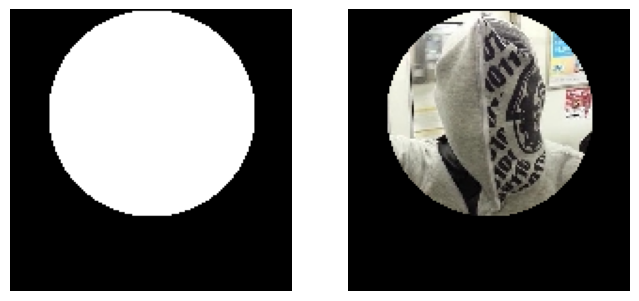

In [11]:
# Continued from the previous code.
[H,W,C] = img.shape
r = 55
c = 75
w = 55
img_bw = np.zeros( (H,W,C), dtype=np.uint8 )
for i in range(H):
  for j in range(W):
    if sqrt((r-i)**2 + (c-j)**2) < w :
      img_bw[i,j,:] = 255

fig=plt.figure(figsize=(8, 4))

fig.add_subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img_bw)

fig.add_subplot(1, 2, 2)
plt.axis('off')
plt.imshow(img & img_bw)

# Video creator

Complete `img_addition()` in the cell below.
$$
\begin{align*}
Im\_addition &= w_1Im_1+w_2Im_2 \\
w_1 + w_2 &= 1.0
\end{align*}
$$

In [12]:
def img_addition(img1,img2,w1,w2):
    return np.uint8(w1*img1+w2*img2)

(408, 700, 3)
(400, 700, 3)


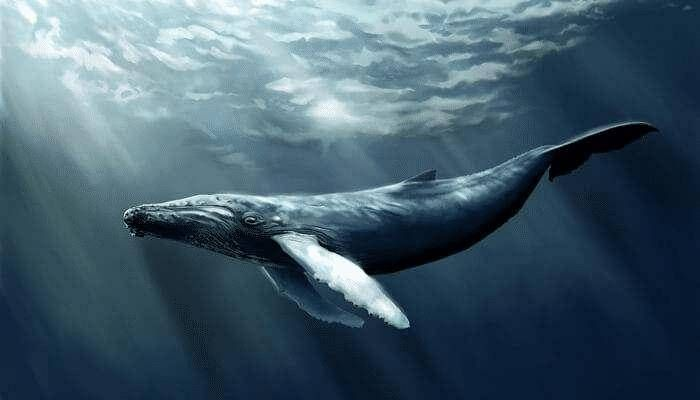

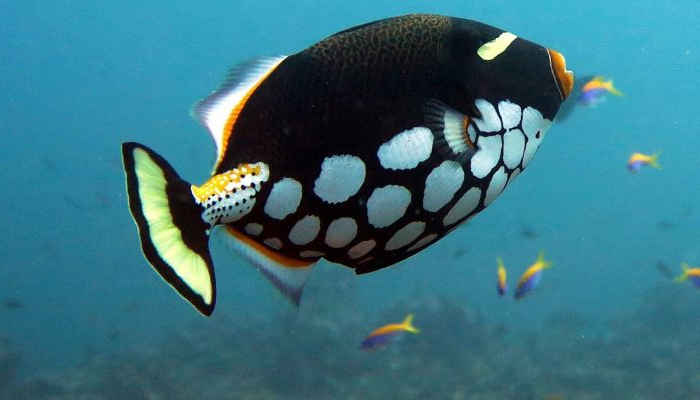

In [13]:
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt   #from matplotlib import pyplot as plt

import os
import matplotlib.animation as animation
from IPython.display import HTML

url_1 = "https://t1.blockdit.com/photos/2023/06/649d48577113a6487634e8eb_800x0xcover_8KnnoajW.jpg"
url_2 = "https://sanookscuba.com/wp-content/uploads/2017/08/similan-islands-clown-triggerfish-1140x530.jpg"
img1 = io.imread(url_1)
print(img1.shape)
img1 = img1[0:400,:,:]

img2 = io.imread(url_2)
img2 = img2[0:400,100:800,:]
print(img2.shape)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
cv2_imshow(img1)
cv2_imshow(img2)

Use the `img_addition()` function here and save the result to an array for creating a video in a later part. Use weight values in the range [0, 1] with ***at least 20 steps***, ***first increasing from 0 to 1 and then decreasing from 1 back to 0***.

In [14]:
w1 = [i * 0.1 for i in range(11)] + [i * 0.1 for i in range(10, -1, -1)]
w2 = [i * 0.1 for i in range(10,-1,-1)] + [i * 0.1 for i in range(11)]
image_arr = []
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
for i in range(len(w1)):
    print(w1[i],w2[i])
    image_arr.append(img_addition(img1,img2,w1[i],w2[i]))

0.0 1.0
0.1 0.9
0.2 0.8
0.30000000000000004 0.7000000000000001
0.4 0.6000000000000001
0.5 0.5
0.6000000000000001 0.4
0.7000000000000001 0.30000000000000004
0.8 0.2
0.9 0.1
1.0 0.0
1.0 0.0
0.9 0.1
0.8 0.2
0.7000000000000001 0.30000000000000004
0.6000000000000001 0.4
0.5 0.5
0.4 0.6000000000000001
0.30000000000000004 0.7000000000000001
0.2 0.8
0.1 0.9
0.0 1.0


Save the array of images to a video. Please complete the function below.

In [15]:
def write_images_to_video(image_array, output_file, frame_rate=30):
    height, width, _ = image_array[0].shape
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_file, fourcc, frame_rate, (width, height))

    for image in image_array:
        bgr_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        for i in range(15):
            out.write(bgr_image)
    out.release()

Use `write_images_to_video()` and save the result.

In [16]:
output_folder = "output"
os.makedirs(output_folder, exist_ok=True)

output_file =  os.path.join(output_folder, "output_image_add.mp4")
write_images_to_video(image_arr,output_file)

Now use `matplotlib.animation` to display the animation from the images array.

In [17]:
%%capture
fig = plt.figure()
ims = []
for im in image_arr:
    imgplot = plt.imshow(im)
    plt.axis('off')
    ims.append([imgplot])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True)

Expected output
The output should resemble this, but not be identical
addition-2.gif

In [ ]:
display(HTML(ani.to_jshtml()))

# **Image Enhancement in the Spatial Domain**

## Windowing Filtering Technique

### Convolution

ใช้เทคนิคในการเลื่อนหน้าต่างย่อยขนาด m x n ที่มีค่า w(x, y) คือ สัมประสิทธิ์การกรอง (น้ำหนักถ่วงของเทมเพลตตัวกรอง หรือ ค่าตัวถ่วงน้ำหนักการกรอง)
ผลจากการกระทำที่พิกเซล g(x, y) คือ
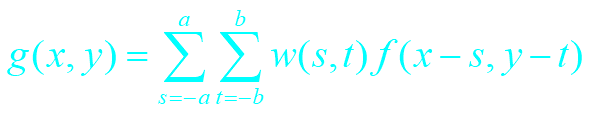


เมื่อ 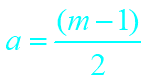 และ
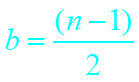

หน้าต่างย่อยขนาด 3 x 3
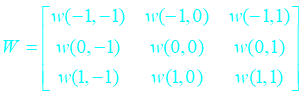

ผลจากการกระทำที่พิกเซล g(x, y) คือ

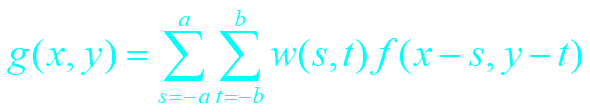

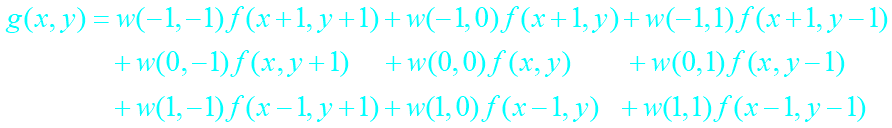

In [ ]:
import numpy as np
img_f = np.array([[ 1,  2,  3,  4,  5],
                  [ 6,  7,  8,  9, 10],
                  [11, 12, 13, 14, 15]])
w = np.array([[11, 12, 13],
              [14, 15, 16],
              [17, 18, 19]])
img_g_at_r1c1 = 11*13+12*12+13*11 + 14*8+15*7+16*6 + 17*3+18*2+19*1
print(img_g_at_r1c1)
img_g_at_r1c2 = 11*14+12*13+13*12 + 14*9+15*8+16*7 + 17*4+18*3+19*2
print(img_g_at_r1c2)
img_g_at_r1c3 = 11*15+12*14+13*13 + 14*10+15*9+16*8 + 17*5+18*4+19*3
print(img_g_at_r1c3)

แต่เนื่องจาก index ที่บอกตำแหน่งของ array เริ่มที่ 0 (ไม่มีตำแน่งติดลบ) จึงจำเป็นต้องปรับการเขียนโปรแกรม โดยอาจปรับสมการใหม่ไม่ให้มีติดลบ หรือสร้าง Function ที่ทำให้กำหนดตำแหน่งติดลบได้

In [ ]:
import numpy as np
img_f = np.array([[ 1,  2,  3,  4,  5],
                  [ 6,  7,  8,  9, 10],
                  [11, 12, 13, 14, 15]])
w = np.array([[11, 12, 13],
              [14, 15, 16],
              [17, 18, 19]])
[M, N] = img_f.shape
[m, n] = w.shape
img_g = np.zeros((M, N))

a = int((m-1)/2)
b = int((n-1)/2)

for x in range(a,M-a):
    for y in range(b,N-b):
      # print("process in pixel index",x, y,"value",img_f[x, y])
      for s in range(-a,a+1):
        for t in range(-b,b+1):
          u = x - s
          v = y - t
          # print("\t\t    f ",u, v,"    w ",s+a, t+b)
          img_g[x, y] = img_g[x, y] + img_f[u, v] * w[s+a, t+b]

img_g

array([[   0.,    0.,    0.,    0.,    0.],
       [   0.,  849.,  984., 1119.,    0.],
       [   0.,    0.,    0.,    0.,    0.]])

### Image sharpening

#### Download moon image

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


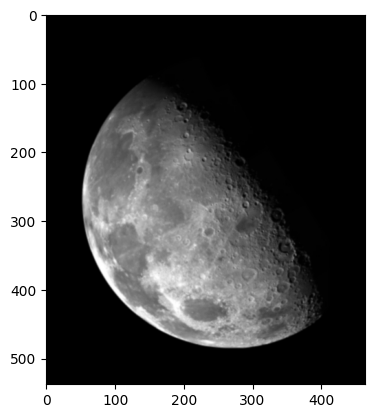

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image
import matplotlib.pyplot as plt   #from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

drive = '/content/drive/MyDrive/Colab Notebooks/NextGen Ai Camp/moon.jpg'
img_f = io.imread(drive)

plt.imshow(img_f, cmap='gray')
plt.show()

#### Filtering this image with the Laplacian mask

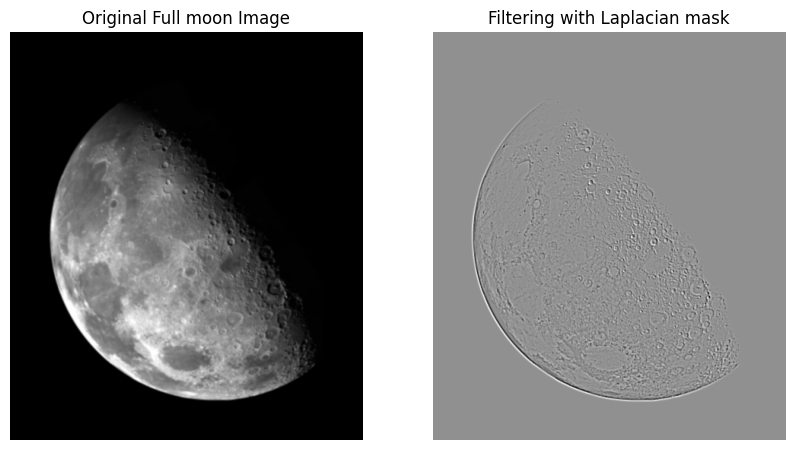

In [ ]:
# Continued from the path : Download moon image
w = np.array([[1,  1, 1],
              [1, -8, 1],
              [1,  1, 1]])
[M, N] = img_f.shape
[m, n] = w.shape
img_g = np.zeros((M, N))

a = int((m-1)/2)
b = int((n-1)/2)

for x in range(a,M-a):
    for y in range(b,N-b):
      # print("process in pixel index",x, y,"value",img_f[x, y])
      for s in range(-a,a+1):
        for t in range(-b,b+1):
          u = x - s
          v = y - t
          # print("\t\t    f ",u, v,"    w ",s+a, t+b)
          img_g[x, y] = img_g[x, y] + img_f[u, v] * w[s+a, t+b]
      img_g[x, y] = img_g[x, y]/9

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(img_f, cmap='gray')
axs[1].imshow(img_g, cmap='gray')
axs[0].axis('off')
axs[1].axis('off')
axs[0].set_title('Original Full moon Image')
axs[1].set_title('Filtering with Laplacian mask')
plt.show()

เนื่องจากผลลบภาพต้นฉับ ด้วยผลลัพธ์จากการทำ Convolution ภาพด้วย Laplacian mask เกินช่วงของรดับสีภาพ (0-255) จึงต้องทำการ normalization ภาพ

In [ ]:
# Continued from the previous code.
max = np.max(img_f-img_g)
min = np.min(img_f-img_g)
print(max, min)
img_fin = (img_f-img_g-min)/(max-min)*255
img_fin = img_fin.astype(np.uint8)

263.6666666666667 -11.444444444444443


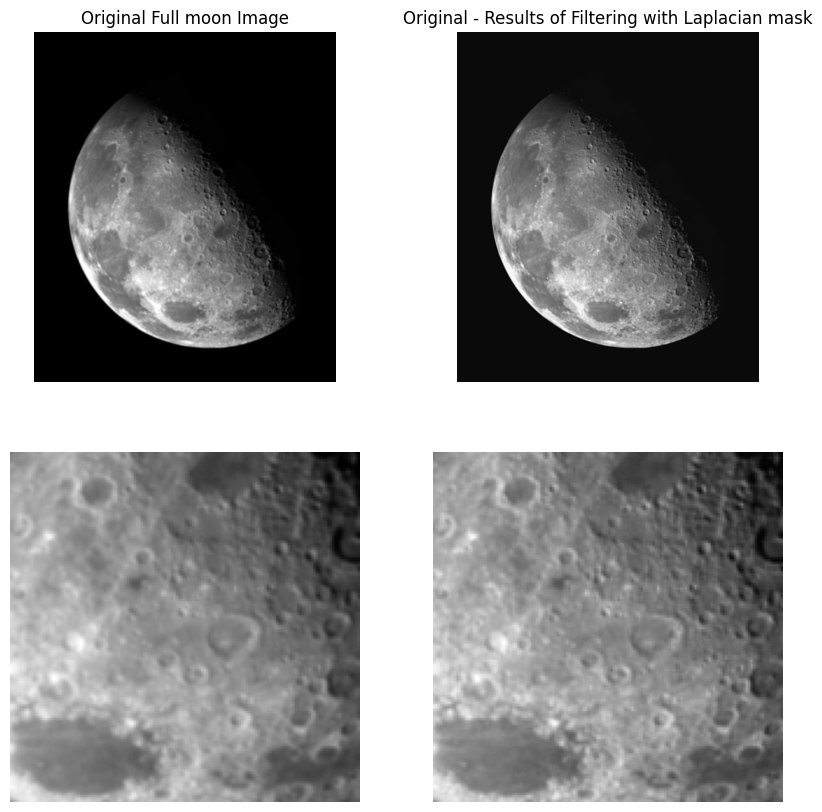

In [ ]:
# Continued from the previous code.
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0,0].imshow(img_f, cmap='gray')
axs[0,1].imshow(img_fin, cmap='gray')
axs[1,0].imshow(img_f[300:450,200:350], cmap='gray')
axs[1,1].imshow(img_fin[300:450,200:350], cmap='gray')
for x in range(2):
  for y in range(2):
    axs[x,y].axis('off')
axs[0,0].set_title('Original Full moon Image')
axs[0,1].set_title('Original - Results of Filtering with Laplacian mask')
plt.show()